In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.losses import binary_crossentropy
from tqdm import tqdm

In [22]:
df=pd.read_csv("mushroom_cleaned.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [23]:
df.head(3)

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1


In [24]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [25]:
targets = pd.DataFrame(df["class"], columns=["class"])

targets.value_counts()

class
1        29675
0        24360
Name: count, dtype: int64

In [26]:
#balancing class col to have equal number of 0 and 1
class_1 = df[df["class"] == 1].head(24000)
class_0 = df[df["class"] == 0].head(24000)

balanced_df = pd.concat([class_1, class_0])
targets = pd.DataFrame(balanced_df["class"], columns=["class"])

targets.value_counts()


class
0        24000
1        24000
Name: count, dtype: int64

In [27]:
df.drop(columns=['class'], inplace=True)


In [28]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season'],
      dtype='object')

In [29]:
cols = ['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
                     'stem-height', 'stem-width', 'stem-color', 'season']


x = df[cols]
mean_x = x.mean()
std_x = x.std()

df[cols] = (x - mean_x) / std_x

df.describe()


,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season
count,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04,5.403500e+04
mean,7.574213e-17,5.891055e-17,1.683159e-17,-5.891055e-17,2.188106e-16,-7.784608e-17,-4.207896e-17,2.735133e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.576223e+00,-1.851564e+00,-9.610715e-01,-2.290281e+00,-1.165470e+00,-1.343997e+00,-2.580583e+00,-3.026211e+00
25%,-7.731863e-01,-9.258550e-01,-9.610715e-01,-7.279110e-01,-7.498255e-01,-8.056728e-01,-7.412645e-01,-2.084882e-01
50%,-1.174190e-01,4.627091e-01,-5.124037e-01,2.095111e-01,-2.547200e-01,-1.637751e-01,7.915009e-01,-2.934747e-02
75%,5.939218e-01,9.255638e-01,8.335995e-01,8.344592e-01,4.543199e-01,6.034333e-01,7.915009e-01,-2.934747e-02
max,3.678251e+00,9.255638e-01,1.730935e+00,1.146933e+00,4.725589e+00,3.219614e+00,1.098054e+00,2.788376e+00


In [30]:
df.shape,targets.shape

((54035, 8), (48000, 1))

In [31]:
# converting into tensors
inputs_tf = tf.constant(df)
targets_tf = tf.cast(tf.constant(targets), tf.float64)

In [32]:
inputs_tf = inputs_tf[:48000]

In [33]:
inputs_tf.shape,targets_tf.shape

(TensorShape([48000, 8]), TensorShape([48000, 1]))

In [34]:
#binary classification we use sigmoid function as activation function
#multi-class classification we use softmax function as activation function

In [35]:
# initializing the model
weights = tf.Variable(tf.random.normal(shape=(8,1), dtype = tf.float64))
bias = tf.Variable(tf.random.normal(shape=(1,), dtype = tf.float64))

weights,bias

(<tf.Variable 'Variable:0' shape=(8, 1) dtype=float64, numpy=
 array([[ 0.95290919],
        [ 1.7745559 ],
        [ 0.66652746],
        [-0.69062387],
        [-0.44535226],
        [-0.35933904],
        [-0.75710045],
        [-2.17439746]])>,
 <tf.Variable 'Variable:0' shape=(1,) dtype=float64, numpy=array([-1.47880833])>)

In [36]:
# main training loop


# activation function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

mean_loss_list = []
accuracy_list = []

lr = 0.01
epochs = range(3500)

for epoch in tqdm(epochs):
    
    with tf.GradientTape() as tape:
        
        # Making prediction
        preds = tf.add(inputs_tf @ weights, bias)
        prob = sigmoid(preds)
       
        #calculating loss
        loss = binary_crossentropy(targets_tf, prob)
        mean_loss = tf.reduce_sum(loss)/ len(targets_tf)
        
        
        mean_loss_list.append(mean_loss.numpy())


        #accuracy
        predicted_classes = tf.cast(prob > 0.5, dtype=tf.float64)  
        correct_predictions = tf.equal(predicted_classes, targets_tf)
        accuracy = tf.reduce_mean(tf.cast(correct_predictions, dtype=tf.float64))
        
        accuracy_list.append(accuracy.numpy())
        
        # taking gradients
        w_grad, b_grad = tape.gradient( mean_loss , [weights,bias] )
        
        
        # updating model
        weights = tf.Variable(weights - lr * w_grad)
        bias = tf.Variable(bias - lr * b_grad)

        weights.assign_sub(lr * w_grad)
        bias.assign_sub(lr * b_grad)

        #print(mean_loss)

100%|██████████| 3500/3500 [01:13<00:00, 47.48it/s]


In [37]:
print(accuracy_list[-1]*100)

68.89166666666667


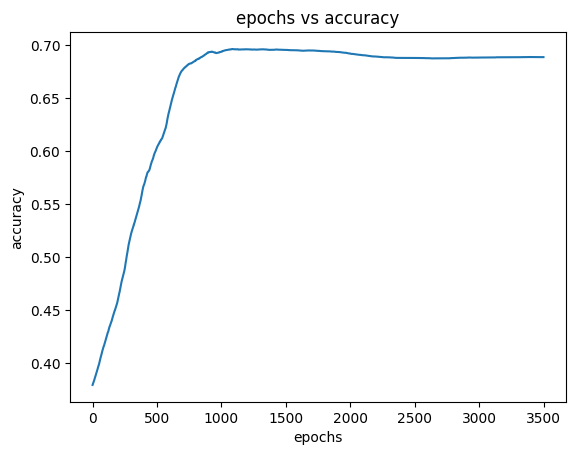

In [38]:
plt.plot(epochs,accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.title('epochs vs accuracy')
plt.show()

In [39]:
#predicting the model

labels=[0,1]

def predict(inputs_tf):
    pred = inputs_tf @ weights + bias
    prob = sigmoid(pred)

   
    prob = list(prob[0])
    
    for label, p in zip(labels, prob):
        print(f"{label} : {float(p)*100:.2f}%")
        
    return labels[int(tf.where(pred[0] == tf.reduce_max(pred[0]))[0,0])]

In [40]:
sample_input = np.array([5.1, 3.5, 1.4, 0.2, 0.2, 0.2, 0.2, 0.2])

print(sample_input,mean_x)

samp=(sample_input-mean_x)/ std_x
samp_tf=tf.constant(samp)

samp_tf = tf.reshape(samp_tf, (1,8))

res=predict(samp_tf)

if res==0:
    print("edible to eat")
else:
    print("poisonous to eat")



[5.1 3.5 1.4 0.2 0.2 0.2 0.2 0.2] cap-diameter        567.257204
cap-shape             4.000315
gill-attachment       2.142056
gill-color            7.329509
stem-height           0.759110
stem-width         1051.081299
stem-color            8.418062
season                0.952163
dtype: float64
0 : 7.12%
edible to eat
